# Ejercicio 3: Representación Gráfica de Vectores de Documentos y Consultas

## Objetivo de la práctica
- Comprender la representación de documentos y consultas en el modelo de espacio vectorial, mediante el cálculo de matrices término-documento usando medidas como TF y TF-IDF.
- Aplicar la similitud coseno para comparar documentos con consultas, y utilizarla para recuperar y ordenar documentos según su relevancia.
- Visualizar de forma intuitiva los vectores de documentos y consultas, mediante reducción de dimensionalidad y representación gráfica en el plano, para facilitar la interpretación geométrica de la recuperación de información.

## Parte 1: Construcción de la matriz término-documento y TF-IDF

### Actividad
1. Usa el siguiente corpus de 4 documentos.
2. Vectoriza los documentos usando:
   - Frecuencia absoluta (TF)
   - TF-IDF
3. Visualiza los documentos como un gráfico de dispersión 2D y 3D.

In [233]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import math
from sklearn.metrics.pairwise import cosine_similarity

In [234]:
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]
vocab = set()
for doc in documents:
    for word in doc.lower().strip('.').split(" "):
        vocab.add(word)
print(vocab)

{'se', 'y', 'el', 'limpia', 'jugaron', 'es', 'escondió', 'importante', 'debajo', 'de', 'limpieza', 'cómoda', 'perro', 'gato', 'cama', 'jardín', 'en', 'estaba', 'la', 'del'}


In [235]:
# Representación TF
dict_tf = {}
i = 0
for doc in documents:
  dict_tfd = {}
  for term in vocab:
    count = doc.lower().strip('.').count(term)
    dict_tfd[term] = count
  dict_tf[i] = dict_tfd
  i += 1
print(dict_tf)

{0: {'se': 1, 'y': 0, 'el': 1, 'limpia': 0, 'jugaron': 0, 'es': 1, 'escondió': 1, 'importante': 0, 'debajo': 1, 'de': 2, 'limpieza': 0, 'cómoda': 0, 'perro': 0, 'gato': 1, 'cama': 1, 'jardín': 0, 'en': 0, 'estaba': 0, 'la': 1, 'del': 0}, 1: {'se': 0, 'y': 1, 'el': 0, 'limpia': 1, 'jugaron': 0, 'es': 1, 'escondió': 0, 'importante': 0, 'debajo': 0, 'de': 0, 'limpieza': 0, 'cómoda': 1, 'perro': 0, 'gato': 0, 'cama': 1, 'jardín': 0, 'en': 0, 'estaba': 1, 'la': 1, 'del': 0}, 2: {'se': 0, 'y': 1, 'el': 3, 'limpia': 0, 'jugaron': 1, 'es': 0, 'escondió': 0, 'importante': 0, 'debajo': 0, 'de': 0, 'limpieza': 0, 'cómoda': 0, 'perro': 1, 'gato': 1, 'cama': 0, 'jardín': 1, 'en': 1, 'estaba': 0, 'la': 0, 'del': 0}, 3: {'se': 0, 'y': 0, 'el': 1, 'limpia': 0, 'jugaron': 0, 'es': 1, 'escondió': 0, 'importante': 1, 'debajo': 0, 'de': 1, 'limpieza': 1, 'cómoda': 0, 'perro': 0, 'gato': 0, 'cama': 0, 'jardín': 1, 'en': 0, 'estaba': 0, 'la': 1, 'del': 1}}


In [236]:
# Mostrar matriz TF
matriz = pd.DataFrame(dict_tf)
matriz.T

,se,y,el,limpia,jugaron,es,escondió,importante,debajo,de,limpieza,cómoda,perro,gato,cama,jardín,en,estaba,la,del
0,1,0,1,0,0,1,1,0,1,2,0,0,0,1,1,0,0,0,1,0
1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0
2,0,1,3,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0
3,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,1,1


In [237]:
matriz.to_csv('matriz_tf.csv', index=True)

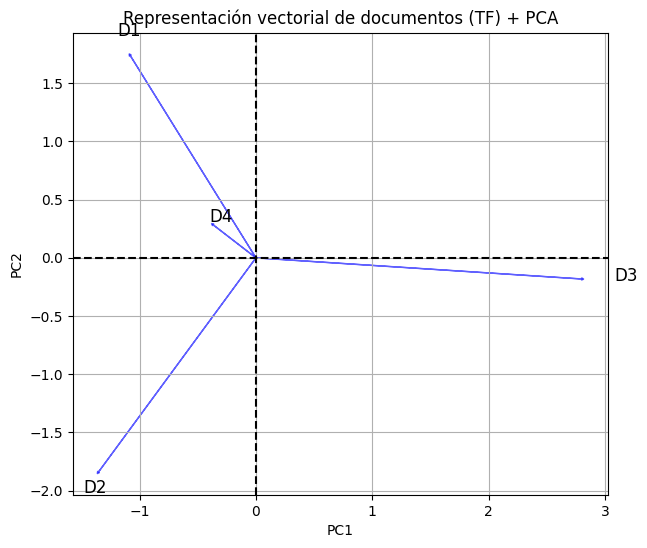

In [238]:
# Reducción PCA y visualización 2D
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(matriz.T)


plt.figure(figsize=(10, 6))
for i, (x, y) in enumerate(docs_2d):
  plt.arrow(0, 0, x, y, head_width=0.02, head_length=0.02, fc='blue', ec='blue', alpha=0.6)
  plt.text(x * 1.1, y *1.1 , f"D{i+1}", fontsize=12)

plt.title("Representación vectorial de documentos (TF) + PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [239]:
# Representación TF-IDF

N = len(documents)
idf = {}
for term in vocab:
    df = sum(1 for doc in documents if term in doc.lower())
    idf[term] = math.log(N / (df + 1))
print(idf)

{'se': 0.6931471805599453, 'y': 0.28768207245178085, 'el': 0.0, 'limpia': 0.6931471805599453, 'jugaron': 0.6931471805599453, 'es': 0.0, 'escondió': 0.6931471805599453, 'importante': 0.6931471805599453, 'debajo': 0.6931471805599453, 'de': 0.28768207245178085, 'limpieza': 0.6931471805599453, 'cómoda': 0.6931471805599453, 'perro': 0.6931471805599453, 'gato': 0.28768207245178085, 'cama': 0.28768207245178085, 'jardín': 0.28768207245178085, 'en': 0.6931471805599453, 'estaba': 0.6931471805599453, 'la': 0.0, 'del': 0.6931471805599453}


In [240]:
# Calculo TF-IDF
dict_tfidf = {}
for doc_id, tf_dict in dict_tf.items():
    tfidf_dict = {}
    for term in vocab:
        tfidf_dict[term] = tf_dict[term] * idf[term]
    dict_tfidf[doc_id] = tfidf_dict

In [241]:
# Mostrar matriz TF-IDF
matriz_tfidf = pd.DataFrame(dict_tfidf)
matriz_tfidf.T

,se,y,el,limpia,jugaron,es,escondió,importante,debajo,de,limpieza,cómoda,perro,gato,cama,jardín,en,estaba,la,del
0,0.693147,0.000000,0.0,0.000000,0.000000,0.0,0.693147,0.000000,0.693147,0.575364,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.000000,0.000000,0.0,0.000000
1,0.000000,0.287682,0.0,0.693147,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.287682,0.000000,0.000000,0.693147,0.0,0.000000
2,0.000000,0.287682,0.0,0.000000,0.693147,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.287682,0.000000,0.287682,0.693147,0.000000,0.0,0.000000
3,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.693147,0.000000,0.287682,0.693147,0.000000,0.000000,0.000000,0.000000,0.287682,0.000000,0.000000,0.0,0.693147


In [242]:
matriz_tfidf.to_csv('matriz_tfidf.csv', index=True)

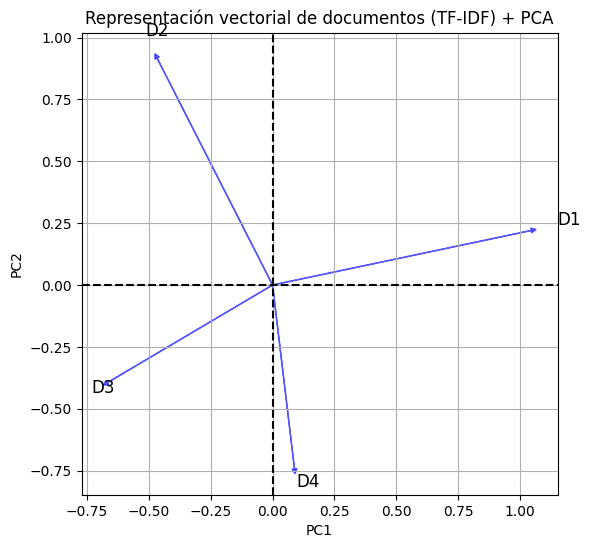

In [243]:
# Reducción PCA y visualización 2D
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(matriz_tfidf.T)


plt.figure(figsize=(10, 6))
for i, (x, y) in enumerate(docs_2d):
  plt.arrow(0, 0, x, y, head_width=0.02, head_length=0.02, fc='blue', ec='blue', alpha=0.6)
  plt.text(x * 1.1, y *1.1 , f"D{i+1}", fontsize=12)

plt.title("Representación vectorial de documentos (TF-IDF) + PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

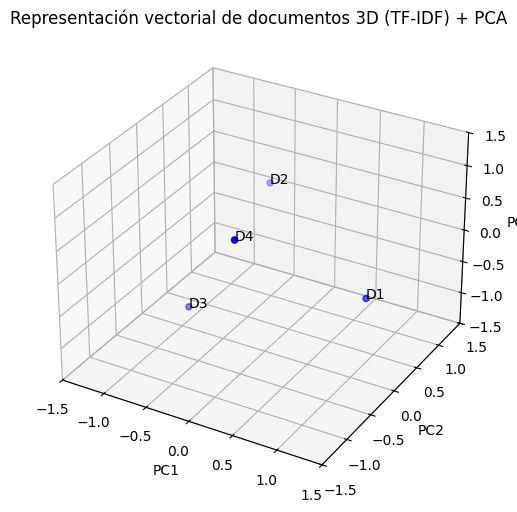

In [244]:
# Reducción PCA y visualización 3D
pca_3d = PCA(n_components=3)
docs_3d = pca_3d.fit_transform(matriz_tfidf.T)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(docs_3d[:, 0], docs_3d[:, 1], docs_3d[:, 2], color='blue')

for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
    ax.text(docs_3d[i, 0], docs_3d[i, 1], docs_3d[i, 2], txt)

ax.set_title("Representación vectorial de documentos 3D (TF-IDF) + PCA")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)
plt.show()

## Parte 2: Representación de la consulta como vector

### Actividad
1. Ingresa una consulta como texto.


In [245]:
consulta = "perro gato"

# Preprocesamiento de la consulta y calculo TF
consulta_tf = {}
palabra_consulta = consulta.lower().strip('.').split(" ")
for term in vocab:
    consulta_tf[term] = palabra_consulta.count(term)
print(consulta_tf)

{'se': 0, 'y': 0, 'el': 0, 'limpia': 0, 'jugaron': 0, 'es': 0, 'escondió': 0, 'importante': 0, 'debajo': 0, 'de': 0, 'limpieza': 0, 'cómoda': 0, 'perro': 1, 'gato': 1, 'cama': 0, 'jardín': 0, 'en': 0, 'estaba': 0, 'la': 0, 'del': 0}


In [246]:
# Calculo TF-IDF
consulta_tfidf = {}
for term in vocab:
    consulta_tfidf[term] = consulta_tf[term] * idf[term]
print(consulta_tfidf)

{'se': 0.0, 'y': 0.0, 'el': 0.0, 'limpia': 0.0, 'jugaron': 0.0, 'es': 0.0, 'escondió': 0.0, 'importante': 0.0, 'debajo': 0.0, 'de': 0.0, 'limpieza': 0.0, 'cómoda': 0.0, 'perro': 0.6931471805599453, 'gato': 0.28768207245178085, 'cama': 0.0, 'jardín': 0.0, 'en': 0.0, 'estaba': 0.0, 'la': 0.0, 'del': 0.0}


2. Representa la consulta en el mismo espacio vectorial que los documentos.


In [247]:
matriz['consulta'] = pd.Series(consulta_tfidf)
matriz.T

,se,y,el,limpia,jugaron,es,escondió,importante,debajo,de,limpieza,cómoda,perro,gato,cama,jardín,en,estaba,la,del
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,1.0
consulta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.287682,0.0,0.0,0.0,0.0,0.0,0.0


3. Calcula similitud coseno entre la consulta y cada documento.


In [248]:
# Similitud coseno
similitud = cosine_similarity(matriz.T)
matriz_similitud = pd.DataFrame(similitud, columns=matriz.columns, index=matriz.columns)
matriz_similitud

,0,1,2,3,consulta
0,1.000000,0.327327,0.298142,0.510310,0.110659
1,0.327327,1.000000,0.097590,0.267261,0.000000
2,0.298142,0.097590,1.000000,0.365148,0.337451
3,0.510310,0.267261,0.365148,1.000000,0.000000
consulta,0.110659,0.000000,0.337451,0.000000,1.000000


4. Visualiza la consulta como un vector en el mismo espacio vectorial que los documentos.

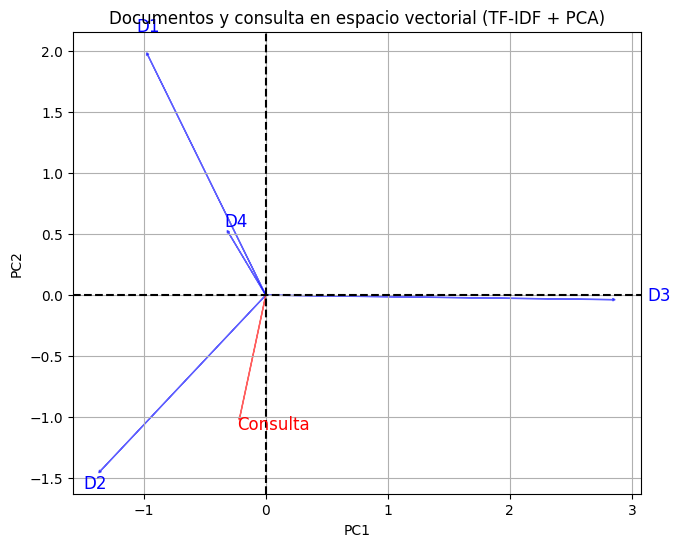

In [249]:
pca = PCA(n_components=2)
coords_2d = pca.fit_transform(matriz.T)

plt.figure(figsize=(10, 6))
for i, (x, y) in enumerate(coords_2d):
    color = 'red' if i == len(coords_2d) - 1 else 'blue'
    etiqueta = "Consulta" if i == len(coords_2d) - 1 else f"D{i+1}"
    plt.arrow(0, 0, x, y, head_width=0.02, head_length=0.02, fc=color, ec=color, alpha=0.6)
    plt.text(x * 1.1, y * 1.1, etiqueta, fontsize=12, color=color)

plt.title("Documentos y consulta en espacio vectorial (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## Parte 3: Consulta por similitud y ranking de documentos

### Actividad
1. Con la misma representación de vectores, implementar una función que devuelva los documentos más relevantes a una consulta usando similitud coseno.
2. Dibuja los vectores (de documentos y de consulta) como flechas desde el origen usando `plt.quiver()` o `plt.arrow()`

In [250]:
def get_relevant_docs(documents):
    # Obtener similitudes con la consulta
    doc_similarities = []
    for i in range(len(documents)):
      doc_similarities.append((documents[i], similitud[-1][i]))

    # Ordenar los documentos por similitud
    doc_similarities.sort(key=lambda x: x[1], reverse=True)
    return doc_similarities

In [251]:
# Mostrar los documentos relevantes con el índice correcto
relevant_docs = get_relevant_docs(documents)

for doc_id, (doc, similarity) in enumerate(relevant_docs):
    print(f"D{documents.index(doc) + 1}: {doc.lower().strip('.').split(" ")}, Similitud: {similarity:.4f}")

D3: ['el', 'perro', 'y', 'el', 'gato', 'jugaron', 'en', 'el', 'jardín'], Similitud: 0.3375
D1: ['el', 'gato', 'se', 'escondió', 'debajo', 'de', 'la', 'cama'], Similitud: 0.1107
D2: ['la', 'cama', 'estaba', 'limpia', 'y', 'cómoda'], Similitud: 0.0000
D4: ['la', 'limpieza', 'del', 'jardín', 'es', 'importante'], Similitud: 0.0000


In [252]:
# Visualización de los vectores
pca = PCA(n_components=2)
coords_2d = pca.fit_transform(matriz.T)

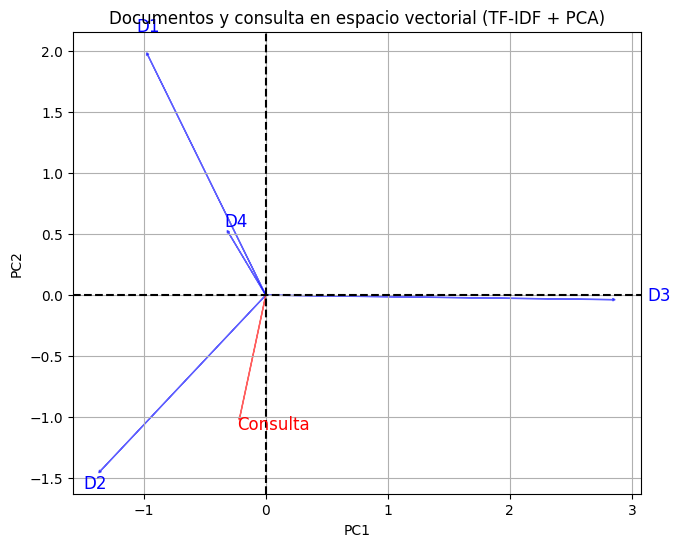

In [253]:
# Agregar la consulta al gráfico
plt.figure(figsize=(10, 6))
for i, (x, y) in enumerate(coords_2d):
    color = 'red' if i == len(coords_2d) - 1 else 'blue'
    etiqueta = "Consulta" if i == len(coords_2d) - 1 else f"D{i+1}"
    plt.arrow(0, 0, x, y, head_width=0.02, head_length=0.02, fc=color, ec=color, alpha=0.6)
    plt.text(x * 1.1, y * 1.1, etiqueta, fontsize=12, color=color)

plt.title("Documentos y consulta en espacio vectorial (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()